In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import pickle

In [127]:
train=pd.read_csv("train (1).csv")
test=pd.read_csv("test.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [75]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [76]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [77]:
train[train.duplicated()].shape

(0, 13)

In [78]:
test[test.duplicated()].shape

(0, 12)

In [79]:
test_original=test
train_original=train

In [80]:
test_original.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Univariant analysis

# categorical variables

<AxesSubplot:ylabel='Loan_Status'>

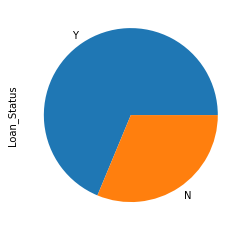

In [81]:
train.Loan_Status.value_counts().plot(kind="pie") #Loan approved is higher than reject

<AxesSubplot:ylabel='Gender'>

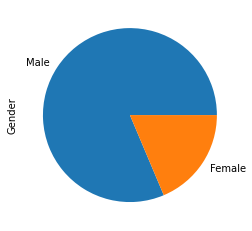

In [82]:
train.Gender.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Married'>

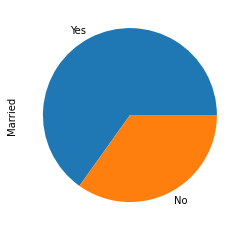

In [83]:
train.Married.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Self_Employed'>

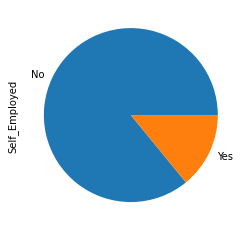

In [84]:
train.Self_Employed.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Credit_History'>

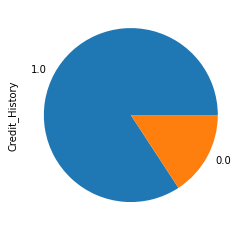

In [85]:
train.Credit_History.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Dependents'>

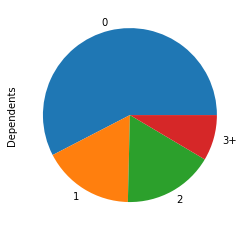

In [86]:
train.Dependents.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Education'>

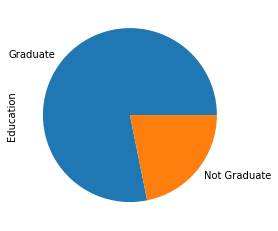

In [87]:
train.Education.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Property_Area'>

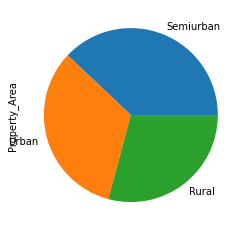

In [88]:
train.Property_Area.value_counts().plot(kind="pie")

# Numerical variables

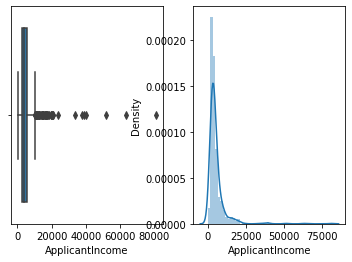

In [89]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['ApplicantIncome'])
plt.subplot(122)
sns.distplot(train["ApplicantIncome"]);
plt.show() # Left skewed not normal distribution

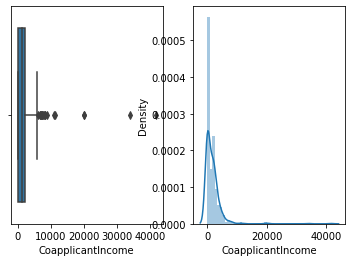

In [90]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['CoapplicantIncome'])
plt.subplot(122)
sns.distplot(train["CoapplicantIncome"]);
plt.show() # Left skewed- not normal distribution

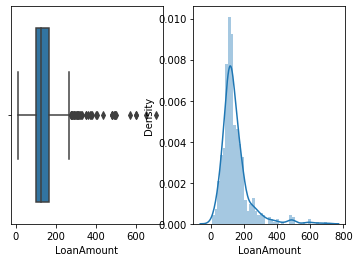

In [91]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['LoanAmount'])
plt.subplot(122)
sns.distplot(train["LoanAmount"]);
plt.show() # normal distribution

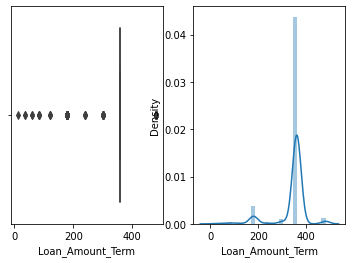

In [92]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['Loan_Amount_Term'])
plt.subplot(122)
sns.distplot(train["Loan_Amount_Term"]);
plt.show() # normal distribution but it has many outliers

# Bivariant Analysis

# Trget variable w.r.t. independent categorcal variables

<AxesSubplot:xlabel='Loan_Status'>

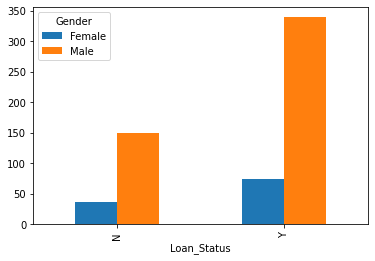

In [93]:
pd.crosstab(train.Loan_Status,train.Gender).plot(kind="bar")
# Male applicants is higher for the approved loans.

<AxesSubplot:xlabel='Loan_Status'>

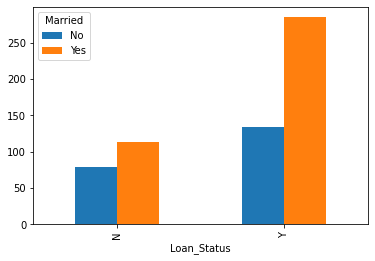

In [94]:
pd.crosstab(train.Loan_Status,train.Married).plot(kind="bar")
# married applicants is higher for the approved loans.

<AxesSubplot:xlabel='Loan_Status'>

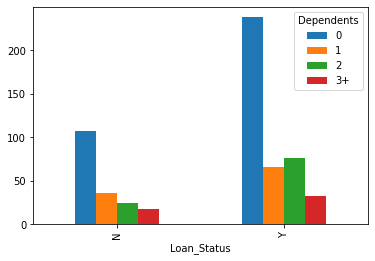

In [95]:
pd.crosstab(train.Loan_Status,train.Dependents).plot(kind="bar")

<AxesSubplot:xlabel='Loan_Status'>

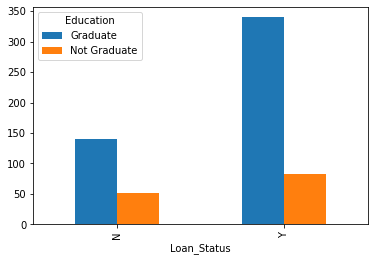

In [96]:
pd.crosstab(train.Loan_Status,train.Education).plot(kind="bar")
# Graduate applicants is higher for the approved loans.

<AxesSubplot:xlabel='Loan_Status'>

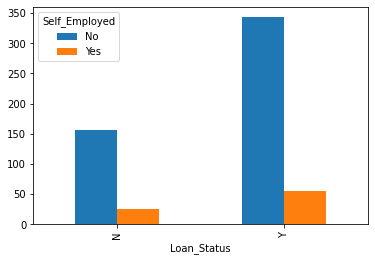

In [97]:
pd.crosstab(train.Loan_Status,train.Self_Employed).plot(kind="bar")

<AxesSubplot:xlabel='Loan_Status'>

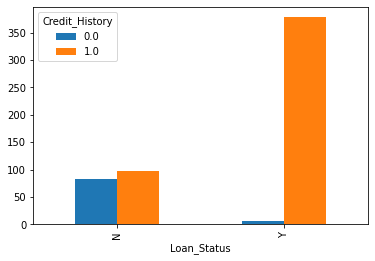

In [98]:
pd.crosstab(train.Loan_Status,train.Credit_History).plot(kind="bar")
# credit history with 1 applicants is higher for the approved loans.

<AxesSubplot:xlabel='Loan_Status'>

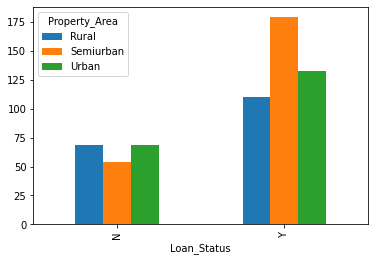

In [99]:
pd.crosstab(train.Loan_Status,train.Property_Area).plot(kind="bar")
# semiurban area applicants is higher for the approved loans.

In [128]:
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

# Target variable w.r.t independent numerical variable

In [101]:
train.corr() # credit_history and coapplicantincome are highly cirelated with loam_status

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


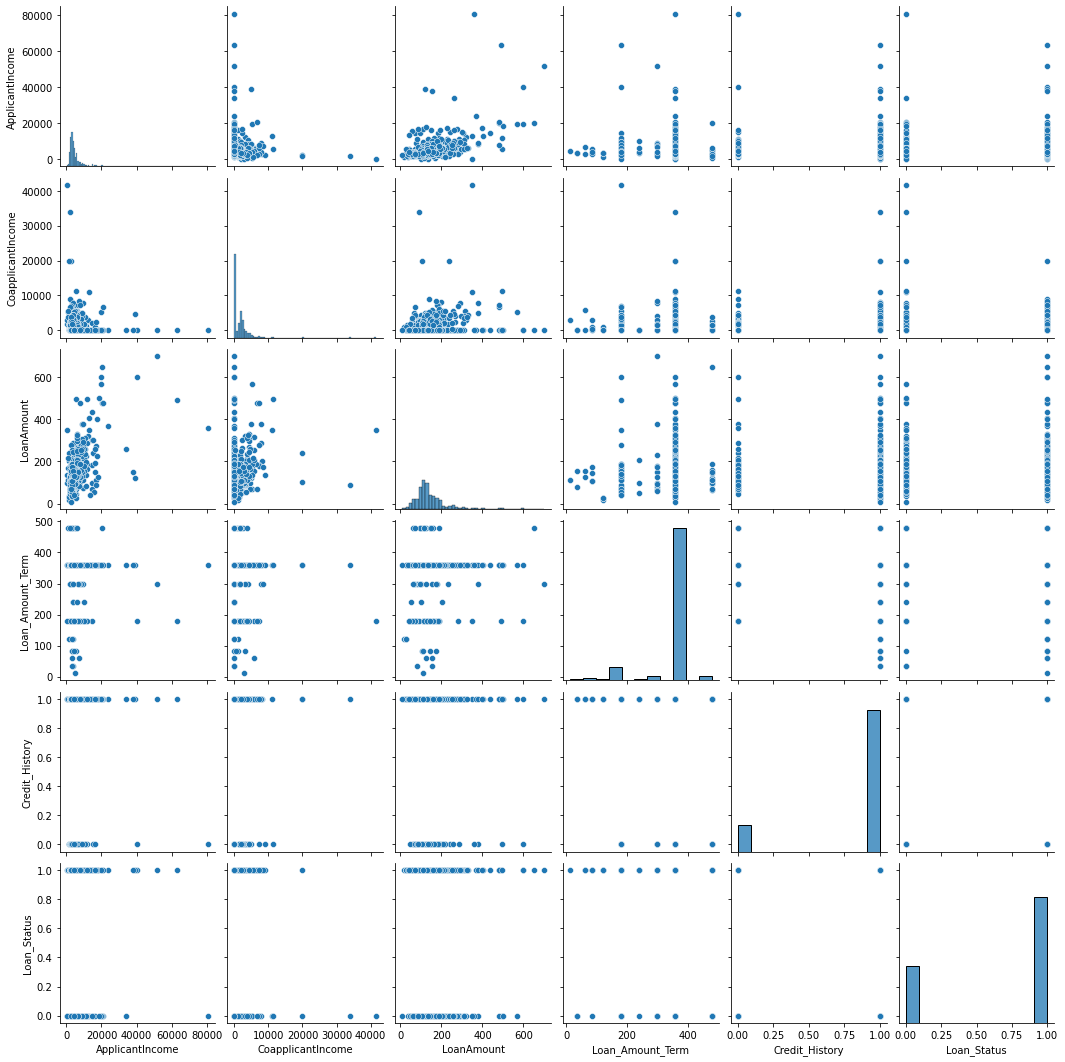

In [102]:
sns.pairplot(train)

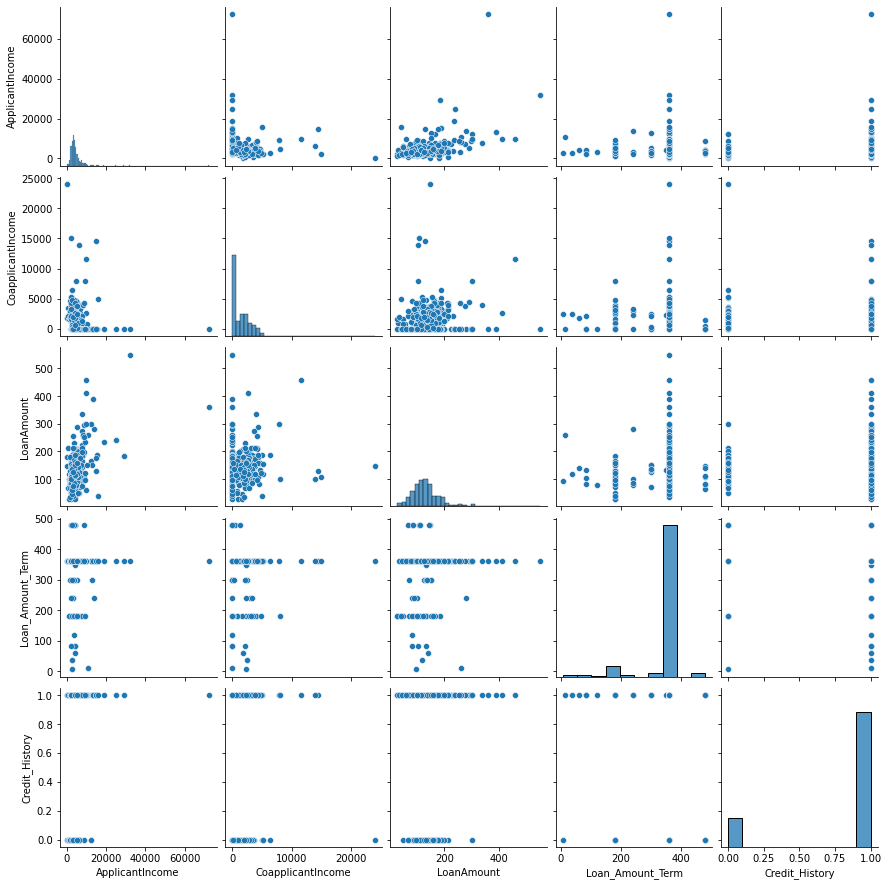

In [103]:
sns.pairplot(test)

# Finding and imputing missing value

<AxesSubplot:>

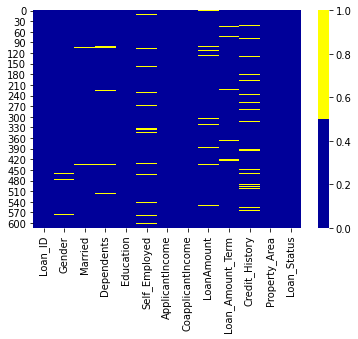

In [104]:
import seaborn as sns
cols = train.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(),
            cmap=sns.color_palette(colours)) 

In [105]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [106]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [129]:
train['Credit_History'].fillna(train['Credit_History'].mode().iloc[0],inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode().iloc[0],inplace=True) 

In [130]:
train['Gender'].fillna(train['Gender'].mode().iloc[0],inplace=True) 
test['Gender'].fillna(test['Gender'].mode().iloc[0],inplace=True) 

In [131]:
train['Married'].fillna(train['Married'].mode().iloc[0],inplace=True) 
test['Married'].fillna(test['Married'].mode().iloc[0],inplace=True) 

In [132]:
train['Self_Employed'].fillna(train['Self_Employed'].mode().iloc[0],inplace=True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode().iloc[0],inplace=True) 

In [133]:
train['Dependents'].fillna(train['Dependents'].mode().iloc[0],inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode().iloc[0],inplace=True) 

In [134]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode().iloc[0],inplace=True) 
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode().iloc[0],inplace=True) 

In [135]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
train['LoanAmount']=imputer.fit_transform(train[['LoanAmount']]) 
test['LoanAmount']=imputer.fit_transform(test[['LoanAmount']])

In [136]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [137]:
train['Dependents']=(train['Dependents'].replace('3+',3)).astype('int64')
test['Dependents']=(test['Dependents'].replace('3+',3)).astype('int64')

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 34.5+ KB


In [140]:
pd.crosstab(train['Loan_Amount_Term'],train["Loan_Status"])

Loan_Status,0,1
Loan_Amount_Term,,
12.0,0,1
36.0,2,0
60.0,0,2
84.0,1,3
120.0,0,3
180.0,15,29
240.0,1,3
300.0,5,8
360.0,159,367


In [141]:
train["TotalIncome"]=train["ApplicantIncome"]+ train["CoapplicantIncome"]
test["TotalIncome"]=test["ApplicantIncome"]+ test["CoapplicantIncome"]

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

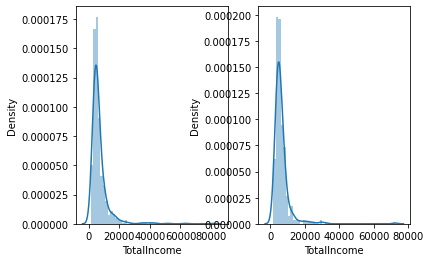

In [142]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["TotalIncome"])
plt.subplot(122)
sns.distplot(test["TotalIncome"])

# left skewed

<AxesSubplot:xlabel='TotalIncomeLog', ylabel='Density'>

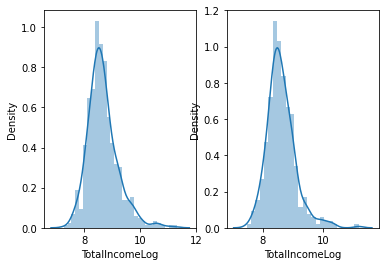

In [143]:
# apply log transformation to normalize TotalIncome
train['TotalIncomeLog'] = np.log(train['TotalIncome'])
test['TotalIncomeLog'] = np.log(test['TotalIncome'])

plt.figure(1)
plt.subplot(121)
sns.distplot(train["TotalIncomeLog"])
plt.subplot(122)
sns.distplot(test["TotalIncomeLog"])

In [144]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

<AxesSubplot:xlabel='EMI', ylabel='Density'>

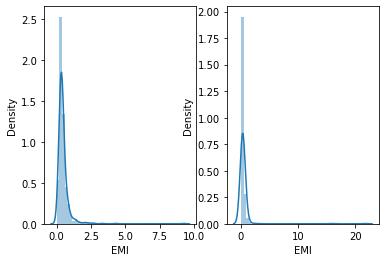

In [145]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["EMI"])
plt.subplot(122)
sns.distplot(test["EMI"])

# right skewed

<AxesSubplot:xlabel='EMI', ylabel='Density'>

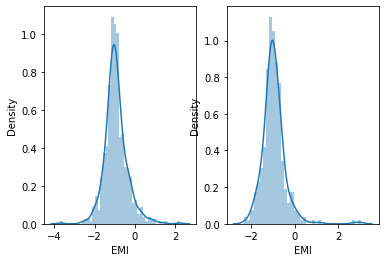

In [146]:
# apply log transformation to normalize LoanAmount
train['EMI'] = np.log(train['EMI'])
test['EMI'] = np.log(test['EMI'])

plt.figure(1)
plt.subplot(121)
sns.distplot(train["EMI"])
plt.subplot(122)
sns.distplot(test["EMI"])

In [147]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncomeLog,EMI
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0,8.674026,-0.899678
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0,8.714568,-1.034074
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0,8.006368,-1.696449
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0,8.505323,-1.098612
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0,8.699515,-0.937344


In [148]:
train.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","TotalIncome","Loan_Amount_Term"],axis=1,inplace=True)
test.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","TotalIncome","Loan_Amount_Term"],axis=1,inplace=True)

In [149]:
train=pd.get_dummies(train,drop_first=True)
train.head()

,Dependents,Credit_History,Loan_Status,TotalIncomeLog,EMI,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,1.0,1,8.674026,-0.899678,1,0,0,0,0,1
1,1,1.0,0,8.714568,-1.034074,1,1,0,0,0,0
2,0,1.0,1,8.006368,-1.696449,1,1,0,1,0,1
3,0,1.0,1,8.505323,-1.098612,1,1,1,0,0,1
4,0,1.0,1,8.699515,-0.937344,1,0,0,0,0,1


In [150]:
test=pd.get_dummies(test,drop_first=True)
test.head()

,Dependents,Credit_History,TotalIncomeLog,EMI,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,1.0,8.651724,-1.185624,1,1,0,0,0,1
1,1,1.0,8.428581,-1.049822,1,1,0,0,0,1
2,2,1.0,8.824678,-0.548566,1,1,0,0,0,1
3,2,1.0,8.494129,-1.280934,1,1,0,0,0,1
4,0,1.0,8.094378,-1.529395,1,0,1,0,0,1


In [151]:
train['Loan_Status'].value_counts() #loan_status 1 is high

1    422
0    192
Name: Loan_Status, dtype: int64

In [152]:
train_1=train[train.Loan_Status==1]
train_0=train[train.Loan_Status==0]

In [153]:
from sklearn.utils import resample
train_new=resample(train_0,replace=True,n_samples=422,random_state=123) #Data balance

In [154]:
train=pd.concat([train_new,train_1])
train.head()

,Dependents,Credit_History,Loan_Status,TotalIncomeLog,EMI,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
357,1,1.0,0,8.262301,-1.681411,1,1,0,0,0,1
409,3,0.0,0,11.302204,0.000000,1,1,0,0,0,0
199,0,1.0,0,9.305651,-1.467263,1,0,0,1,0,1
308,0,1.0,0,9.915070,0.287682,1,0,0,0,0,0
48,0,0.0,0,8.713582,-1.098612,0,1,0,0,0,1


In [155]:
train=train.rename(columns={"Education_Not Graduate": "Education_Not" })
test=test.rename(columns={"Education_Not Graduate": "Education_Not" })

In [156]:
train['Loan_Status'].value_counts() # balanced loan_status count using resample

0    422
1    422
Name: Loan_Status, dtype: int64

In [157]:
x_train=train.drop("Loan_Status",1)
y_train=train[["Loan_Status"]]
 
x_train.head()

,Dependents,Credit_History,TotalIncomeLog,EMI,Gender_Male,Married_Yes,Education_Not,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
357,1,1.0,8.262301,-1.681411,1,1,0,0,0,1
409,3,0.0,11.302204,0.000000,1,1,0,0,0,0
199,0,1.0,9.305651,-1.467263,1,0,0,1,0,1
308,0,1.0,9.915070,0.287682,1,0,0,0,0,0
48,0,0.0,8.713582,-1.098612,0,1,0,0,0,1


In [158]:
test.head()

,Dependents,Credit_History,TotalIncomeLog,EMI,Gender_Male,Married_Yes,Education_Not,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,1.0,8.651724,-1.185624,1,1,0,0,0,1
1,1,1.0,8.428581,-1.049822,1,1,0,0,0,1
2,2,1.0,8.824678,-0.548566,1,1,0,0,0,1
3,2,1.0,8.494129,-1.280934,1,1,0,0,0,1
4,0,1.0,8.094378,-1.529395,1,0,1,0,0,1


# RandomForestClassifier

In [159]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier

paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

RandomForestClassifier(max_depth=19, n_estimators=161, random_state=1)

In [160]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
outcomes = []
clf=grid_search.best_estimator_    
fold = 0
for train_index, test_index in skf.split(x_train, y_train):
    fold += 1
    xk_train, xk_test = x_train.values[train_index], x_train.values[test_index]
    yk_train, yk_test = y_train.values[train_index], y_train.values[test_index]
    clf.fit(xk_train, yk_train)
    predictions = clf.predict(xk_test)
    accuracy = accuracy_score(yk_test, predictions)
    outcomes.append(accuracy)
    print("Fold {0} accuracy: {1}".format(fold, accuracy))     
mean_outcome = np.mean(outcomes)
print("\n\nMean Accuracy: {0}".format(mean_outcome)) 

Fold 1 accuracy: 0.9411764705882353
Fold 2 accuracy: 0.8588235294117647
Fold 3 accuracy: 0.8705882352941177
Fold 4 accuracy: 0.8941176470588236
Fold 5 accuracy: 0.9047619047619048
Fold 6 accuracy: 0.8928571428571429
Fold 7 accuracy: 0.8928571428571429
Fold 8 accuracy: 0.9166666666666666
Fold 9 accuracy: 0.9285714285714286
Fold 10 accuracy: 0.9285714285714286


Mean Accuracy: 0.9028991596638656


In [161]:
importance=clf.feature_importances_
importance

array([0.06131364, 0.20238129, 0.28992024, 0.28017301, 0.02484452,
       0.03127257, 0.02839815, 0.02429254, 0.03345797, 0.02394609])

In [162]:
x_train.columns

Index(['Dependents', 'Credit_History', 'TotalIncomeLog', 'EMI', 'Gender_Male',
       'Married_Yes', 'Education_Not', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

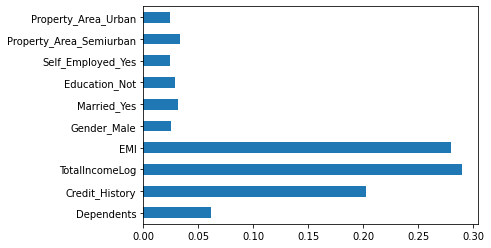

In [163]:
feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns) 
feat_importances .plot(kind='barh') 
plt.show()

In [164]:
pickle.dump(clf,open('model.pkl','wb'))